In [ ]:
import pandas as pd
import os

Task #1: Merge 12 months of sales data into single CSV file

In [ ]:
files = [file for file in os.listdir('/content')]
all_months_df = pd.DataFrame()
for file in files:
  if ".csv" in file:
    all_months_df = pd.concat([all_months_df,pd.read_csv('/content/'+file)])

all_months_df.to_csv('all_months_data.csv',index=False)

read the concatenated csv file and print the first five rows

In [ ]:
all_months_df = pd.read_csv('all_months_data.csv')
all_months_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


## Clean the data

### remove rows with all NAN's

In [ ]:
all_months_df = all_months_df.dropna(how='all') 

### remove rows without useful data

In [ ]:
all_months_df = all_months_df[~(all_months_df['Order Date'] == 'Order Date')]

### Augment data with additional columns

**Task #2: Add month column in dataframe**

#### add month number column

In [ ]:
all_months_df['Month'] = all_months_df['Order Date'].str.split('/').str[0]
all_months_df['Month'] = all_months_df['Month'].astype('int32')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#### add sales column which is the product of "Quantity ordered" and "Price each"

In [ ]:
all_months_df['Quantity Ordered'] =  all_months_df['Quantity Ordered'].astype('int32')
all_months_df['Price Each'] = all_months_df['Price Each'].astype('float32')
all_months_df['Sales Price'] = all_months_df['Quantity Ordered']*all_months_df['Price Each']

##**Question1: What was the best month for sales?**

In [ ]:
 results = all_months_df.groupby(['Month']).sum().reset_index()[['Month','Sales Price']]

Text(0.5, 0, 'Month Number')

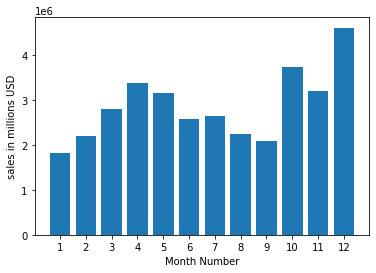

In [ ]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, results['Sales Price'])
plt.xticks(months)
plt.ylabel("sales in millions USD")
plt.xlabel("Month Number")

##**Answer1: December month has highest sale**s 

In [ ]:
def get_city(x):
  return x.split(",")[1]

def get_state(x):
  return x.split(",")[2].split(" ")[1]

all_months_df['City'] = all_months_df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")



 
# alternative technique
#all_months_df['City'] = all_months_df['Purchase Address'].str.split(',').str[1]


results_sales_citywise = all_months_df.groupby('City').sum().reset_index()[['City','Sales Price']]
results_sales_citywise.head()

#all_months_df.head()

,City,Sales Price
0,Atlanta (GA),2795498.50
1,Austin (TX),1819581.75
2,Boston (MA),3661642.00
3,Dallas (TX),2767975.50
4,Los Angeles (CA),5452571.00


##**Quetion2: Which city contributes highest Sales**

Text(0.5, 0, 'City')

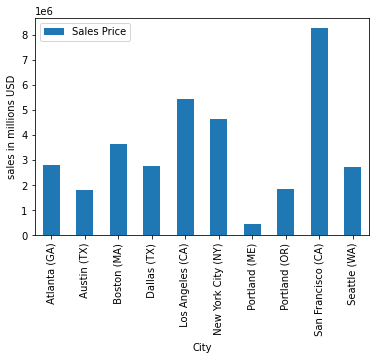

In [ ]:
results_sales_citywise.plot.bar('City', 'Sales Price')
#plt.xticks(results_sales_citywise['City'],rotation='vertical')
plt.ylabel("sales in millions USD")
plt.xlabel("City")

## **Answer2: San Fransisco contributes highest sales**

###Adding hour and minute columns

In [ ]:
all_months_df['Order Date'] = pd.to_datetime(all_months_df['Order Date'])
all_months_df['Hour'] = all_months_df['Order Date'].dt.hour
all_months_df['Minute'] = all_months_df['Order Date'].dt.minute
all_months_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Price,City,Hour,Minute
0,278797,Wired Headphones,1,11.990000,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.990000,New York City (NY),9,54
1,278798,USB-C Charging Cable,2,11.950000,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.900000,Austin (TX),10,3
2,278799,Apple Airpods Headphones,1,150.000000,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.000000,Los Angeles (CA),14,56
3,278800,27in FHD Monitor,1,149.990005,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.990005,Seattle (WA),22,24
4,278801,Bose SoundSport Headphones,1,99.989998,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.989998,Boston (MA),13,56


##**Question 3: What time should we display advertisemens to maximize the likelihood of customer’s buying product?**

Text(0, 0.5, 'No of products sold')

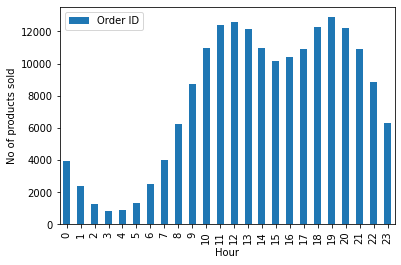

In [ ]:
result_no_products_sold_hourwise = all_months_df.groupby('Hour').count().reset_index()[['Hour','Order ID']]
result_no_products_sold_hourwise.plot.bar('Hour','Order ID')
plt.xlabel('Hour')
plt.ylabel('No of products sold')

##**Answer3 : We should display advertisement between 11:00 to 13:00 and 18:00 to 20:00**

##**Question4: What products are most often sold together?**

In [ ]:
product_sold_together = all_months_df.groupby('Order ID')['Product'].apply(list).reset_index(name='Product Sold Together')

In [ ]:
product_sold_together['No. of Products'] = product_sold_together['Product Sold Together'].str.len()
product_sold_together = product_sold_together[product_sold_together['No. of Products'] >1]

In [ ]:
product_sold_together.head()

,Order ID,Product Sold Together,No. of Products
41,141275,"[USB-C Charging Cable, Wired Headphones]",2
56,141290,"[Apple Airpods Headphones, AA Batteries (4-pack)]",2
131,141365,"[Vareebadd Phone, Wired Headphones]",2
150,141384,"[Google Phone, USB-C Charging Cable]",2
216,141450,"[Google Phone, Bose SoundSport Headphones]",2


In [ ]:
from collections import Counter   
  
# Using counter 
Output = Counter([tuple(i) for i in product_sold_together['Product Sold Together']]) 
  
# Printing output 
for key, value in (Output.most_common(10)):
  print (key, value) 

('iPhone', 'Lightning Charging Cable') 882
('Google Phone', 'USB-C Charging Cable') 856
('iPhone', 'Wired Headphones') 361
('Vareebadd Phone', 'USB-C Charging Cable') 312
('Google Phone', 'Wired Headphones') 303
('iPhone', 'Apple Airpods Headphones') 286
('Google Phone', 'Bose SoundSport Headphones') 161
('Vareebadd Phone', 'Wired Headphones') 104
('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 77
('Vareebadd Phone', 'Bose SoundSport Headphones') 60


In [ ]:
all_months_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales Price,City,Hour,Minute
0,278797,Wired Headphones,1,11.990000,2019-11-21 09:54:00,"46 Park St, New York City, NY 10001",11,11.990000,New York City (NY),9,54
1,278798,USB-C Charging Cable,2,11.950000,2019-11-17 10:03:00,"962 Hickory St, Austin, TX 73301",11,23.900000,Austin (TX),10,3
2,278799,Apple Airpods Headphones,1,150.000000,2019-11-19 14:56:00,"464 Cherry St, Los Angeles, CA 90001",11,150.000000,Los Angeles (CA),14,56
3,278800,27in FHD Monitor,1,149.990005,2019-11-25 22:24:00,"649 10th St, Seattle, WA 98101",11,149.990005,Seattle (WA),22,24
4,278801,Bose SoundSport Headphones,1,99.989998,2019-11-09 13:56:00,"522 Hill St, Boston, MA 02215",11,99.989998,Boston (MA),13,56


##**Answer5: Below mentioned items are frequently sold together**

1. ('iPhone', 'Lightning Charging Cable')   Count: 882 

2. ('Google Phone', 'USB-C Charging Cable')    Count: 856

3. ('iPhone', 'Wired Headphones')  Count: 361

4. ('Vareebadd Phone', 'USB-C Charging Cable')  Count: 312
5. ('Google Phone', 'Wired Headphones')   Count: 303
6. ('iPhone', 'Apple Airpods Headphones') Count: 286
7. ('Google Phone', 'Bose SoundSport Headphones') Count: 161
8. ('Vareebadd Phone', 'Wired Headphones') Count: 104
9. ('Google Phone', 'USB-C Charging Cable', 'Wired Headphones')  Count:77
10. ('Vareebadd Phone', 'Bose SoundSport Headphones') Count:60

##**Question6:What product sold the most? Why do you think it sold the most?**

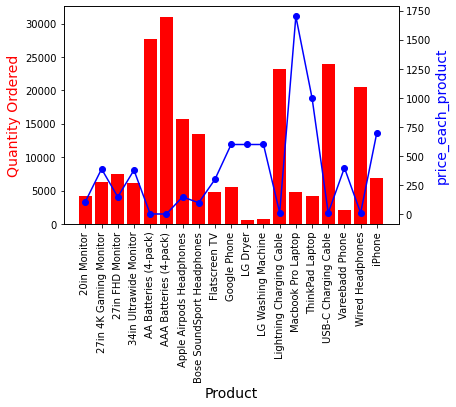

In [ ]:
product_group = all_months_df.groupby(['Product'])
quantities_ordered = product_group.sum()['Quantity Ordered']
price_product = product_group.mean()['Price Each']
products = [product for product, df in product_group]



quantities_sold = all_months_df.groupby(['Product']).sum()['Quantity Ordered'].reset_index()
price_each_product = all_months_df.groupby('Product').mean()['Price Each'].reset_index()

#quantities_sold.plot.bar('Product','Quantity Ordered')
# create figure and axis objects with subplots()

fig,ax = plt.subplots()
# make a plot
ax.plot()
ax.bar(quantities_sold['Product'], quantities_sold['Quantity Ordered'], color="red")
# set x-axis label
ax.set_xlabel('Product',fontsize=14)
# set y-axis label
ax.set_ylabel('Quantity Ordered',color="red",fontsize=14)
ax.set_xticklabels(quantities_sold['Product'],rotation='vertical')
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(quantities_sold['Product'],price_each_product['Price Each'],color="blue",marker="o")
ax2.set_ylabel("price_each_product",color="blue",fontsize=14)
plt.show()

##**Answer6:**
**1. As you can see AAA batteries(4-pack), AA batteries(4-pack), Lightning Charging Cable, USB-C Charging Cable are sold most.** 

**2. The reason being its price (price of such products is vere low). Products like LG Dryer, LG Washing Machine are sold less as they are expensive.** 

**3. This proves inverse relation between product quantity sold and price of the product.** 

**4. That being said, it is not true always for an ex. even though price for Macbook Pro Laptop is high still its quantities sold is higher so we need to look into other factors to investigate this behaviour.** 